<a href="https://colab.research.google.com/github/Alexis2411/Hadoop/blob/main/Tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
#All imports
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

In [3]:
!java --version

openjdk 11.0.15 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [4]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [5]:
!echo $SPARK_HOME

/content/spark-2.4.8-bin-hadoop2.7


In [6]:
import findspark
findspark.init()
from google.colab import files
from pyspark import SparkContext, SparkConf,SQLContext,HiveContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, lit
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
# create SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

In [8]:
spark.version

'2.4.8'

In [9]:
sc = spark.sparkContext

In [10]:
sc.version

'2.4.8'

In [11]:
sqlContext = SQLContext(sc)

In [12]:
#Crear RDD
rdd = sc.parallelize(range(0, 10))
rdd.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
rdd.takeSample(True, 20, 1)

[0, 6, 3, 4, 3, 1, 3, 7, 3, 5, 3, 0, 0, 9, 6, 5, 7, 9, 4, 7]

In [14]:
rdd.takeSample(False, 5, 2)

[5, 9, 3, 4, 6]

In [15]:
rdd.takeSample(False, 15, 3)

[1, 5, 6, 0, 9, 4, 7, 2, 8, 3]

In [16]:
rdd.sample(False, 0.5).take(5)

[1, 4, 6, 7]

In [17]:
rdd.sample(False, 0.5).take(5)

[0, 2, 4, 5, 9]

In [18]:
rdd.sample(False, 0.5).take(5)

[2, 5, 7, 8, 9]

In [19]:
df = spark.range(10)
df.show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [20]:
df.sample(withReplacement=False, fraction=0.5, seed=1).show()

+---+
| id|
+---+
|  0|
|  2|
|  3|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [21]:
df.sample(withReplacement=True, fraction=0.5, seed=1).show()

+---+
| id|
+---+
|  0|
|  2|
|  3|
|  4|
+---+



In [22]:
df.sample(withReplacement=False, fraction=0.5, seed=2).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  7|
+---+



In [23]:
df.sample(withReplacement=False, fraction=0.5, seed=3).show()

+---+
| id|
+---+
|  0|
|  2|
|  9|
+---+



In [25]:
path_csv="/content/daily_weather.csv"
df = sqlContext.read.csv(path_csv,header=True,inferSchema=True)
df.show(10)

+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|               

In [26]:
df_air_temp_9am=df.select("air_temp_9am")
df_air_temp_9am=df_air_temp_9am.na.drop()

In [27]:
df_air_temp_9am=df_air_temp_9am.rdd.map(lambda row : row.air_temp_9am)
arr_air_temp_9am=df_air_temp_9am.collect()
df_air_temp_9am.take(10)

[74.82200000000041,
 71.40384263106537,
 60.637999999998776,
 70.13889486830053,
 44.29400000000284,
 78.40400000000422,
 70.04330431686239,
 51.710000000002346,
 80.58200000000384,
 47.4979999999998]

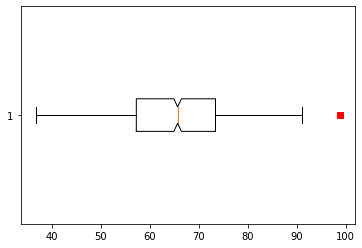

In [28]:
import matplotlib.pyplot as plt
plt.boxplot(arr_air_temp_9am,1,"rs",0)

#normal
#plt.boxplot(arr_air_temp_9am)
#con cintura=1, sin cintura=0
#plt.boxplot(arr_air_temp_9am,1)
#cambiar los puntos extremos a “green diamonds”
#plt.boxplot(arr_air_temp_9am,1,"gD")
#horizontal=0, vertical=1
plt.show()

In [29]:
import plotly.express as px
fig = px.histogram(x=arr_air_temp_9am,labels={'x':'air temp 9am', 'y':'Frecuencia'})
#fig = px.histogram(arr_air_temp_9am,nbins = 10)
fig.show()

In [30]:
df_nona=df.na.drop()
df_nona.createOrReplaceTempView("Weather")
query='SELECT relative_humidity_9am from Weather where air_temp_9am>65'
df_people_names = spark.sql(query)
df_people_names.show(10)

+---------------------+
|relative_humidity_9am|
+---------------------+
|    42.42000000000046|
|   24.328697291802207|
|   12.189101868764444|
|   35.130000000000265|
|   10.657421657822635|
|    29.58000000000045|
|   22.070000000000228|
|   15.189999999999962|
|   12.110889335294598|
|   21.031461768790646|
+---------------------+
only showing top 10 rows



In [31]:
from pyspark.sql.functions import col
df_nona=df.na.drop()
# 2 Apply the transformation and add it to the DataFrame
df_nona = df_nona.withColumn("air_temp_by_rel_hum", col("air_temp_9am")>65)
#Separate True and False in air_temp_by_rel_hum
df_grouped_rel_hum = df_nona.groupby("air_temp_by_rel_hum")
df_grouped_rel_hum.count().show()

+-------------------+-----+
|air_temp_by_rel_hum|count|
+-------------------+-----+
|               true|  558|
|              false|  506|
+-------------------+-----+



Text(0.5, 1.0, 'air humidity 9am')

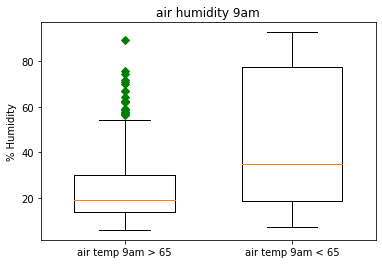

In [32]:
#Divide data
df_gt_65=df_nona.filter(df_nona["air_temp_9am"]>65)
df_lt_65=df_nona.filter(df_nona["air_temp_9am"]<=65)

#Extract variable of interest
df_gt65_humidity=df_gt_65.select("relative_humidity_9am")
df_lt65_humidity=df_lt_65.select("relative_humidity_9am")

#Convert to array
df_gt65_humidity=df_gt65_humidity.rdd.map(lambda row : row.relative_humidity_9am)
arr_gt65_humidity=df_gt65_humidity.collect()
df_lt65_humidity=df_lt65_humidity.rdd.map(lambda row : row.relative_humidity_9am)
arr_lt65_humidity=df_lt65_humidity.collect()

#Boxplots
fig, ax = plt.subplots()
ax.boxplot(arr_gt65_humidity,0,"gD",positions = [1], widths = 0.6)
ax.boxplot(arr_lt65_humidity,0,"bx",positions = [2], widths = 0.6)
ax.set_xticklabels(['air temp 9am > 65', 'air temp 9am < 65'])
ax.set_ylabel('% Humidity')
ax.set_title('air humidity 9am')


In [33]:
#Now we develop a scatter plot
#Select data
df_nona=df.na.drop()
df_temp_9am=df_nona.select("air_temp_9am")
df_humidity_9am=df_nona.select("relative_humidity_9am")
print(df_temp_9am.count(),df_humidity_9am.count())

1064 1064


In [34]:
df_temp_9am=df_temp_9am.rdd.map(lambda row : row.air_temp_9am)
df_humidity_9am=df_humidity_9am.rdd.map(lambda row : row.relative_humidity_9am)
arr_temp_9am=df_temp_9am.collect()
arr_humidity_9am=df_humidity_9am.collect()

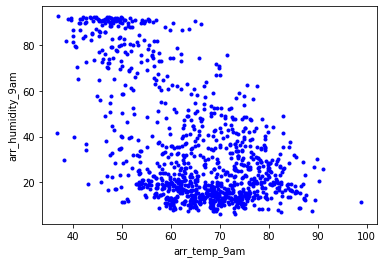

In [35]:
#Plot
plt.plot(arr_temp_9am,arr_humidity_9am,'b.')
plt.xlabel("arr_temp_9am")
plt.ylabel("arr_humidity_9am")
plt.show()

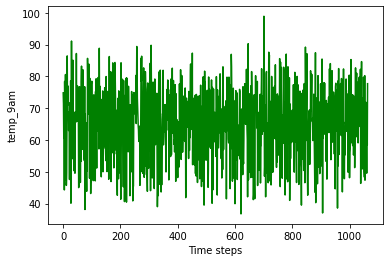

In [36]:
#Line plot
plt.plot(arr_temp_9am,'g')
plt.xlabel("Time steps")
plt.ylabel("temp_9am")
plt.show()

In [37]:
#Bar plot
import plotly.express as px
fig=px.bar(x=arr_temp_9am)
fig.update_traces(marker_color='red',width=1.0)
fig.update_layout(
  autosize=False,
  width=1000,
  height=500,
  yaxis=dict(
    title_text="air temp 9am",
    ticktext=["Time"],
    tickmode="array",
    titlefont=dict(size=30),
  )
)
fig.show()

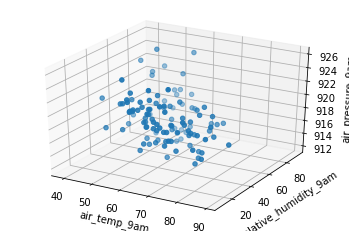

In [38]:
#Create 3D Scatter plot
#Extract info
df_nona=df.na.drop()
df_nona=df_nona.sample(False,0.1)
df_temp_9am=df_nona.select("air_temp_9am")
df_humidity_9am=df_nona.select("relative_humidity_9am")
df_pressure_9am=df_nona.select("air_pressure_9am")

#Create arrays
df_temp_9am=df_temp_9am.rdd.map(lambda row : row.air_temp_9am)
df_humidity_9am=df_humidity_9am.rdd.map(lambda row : row.relative_humidity_9am)
df_pressure_9am=df_pressure_9am.rdd.map(lambda row : row.air_pressure_9am)
arr_temp_9am=df_temp_9am.collect()
arr_humidity_9am=df_humidity_9am.collect()
arr_pressure_9am=df_pressure_9am.collect()

#Plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(arr_temp_9am, arr_humidity_9am, arr_pressure_9am, marker='o')
ax.set_xlabel("air_temp_9am")
ax.set_ylabel("relative_humidity_9am")
ax.set_zlabel("air_pressure_9am")
plt.show()